### Exercise 5.3: Application of numerical integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the integral

$$ E(x) = \int\limits_0^x e^{-t^2} dt$$

Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in steps of 0.1. Choose yourself what method you will use for performing the integral and a suitable number of slices.

In [2]:
def integrand(t):
    return np.exp(-t**2)

def trapezoid(N, a, b):
    h = (b-a)/N #Slice width
    points = np.linspace(a, b, N+1) #Endpoints or the vertices of each slices of trapezoid
    E_value = integrand(points)
    integral = h*(0.5*E_value[0] + 0.5*E_value[-1] + np.sum(E_value[1:-1]))
    return integral

def simpsons(N, a, b):
    h = (b-a)/N
    points = np.linspace(a, b, N+1)
    E_value = integrand(points)
    integral = (1/3)*h*(E_value[0] + E_value[-1] + 4*np.sum(E_value[1:-1:2]) + 2*np.sum(E_value[2:-1:2]))
    return integral

In [3]:
a, b, step = 0, 3, 0.1
inputX = np.arange(a, b+step, step)

N = 1000
trapezoidY = np.array([trapezoid(N, a, x) for x in inputX])
simpsonsY = np.array([simpsons(N, a, x) for x in inputX])

trapezoidY #This will serve as your basis for the plotting

array([0.        , 0.09966766, 0.19736503, 0.29123788, 0.37965283,
       0.46128099, 0.5351535 , 0.60068563, 0.65766981, 0.70624146,
       0.74682407, 0.78006137, 0.80674469, 0.82774292, 0.84394065,
       0.85618833, 0.86526617, 0.87186155, 0.8765586 , 0.87983758,
       0.88208137, 0.88358642, 0.88457601, 0.8852138 , 0.88561674,
       0.88586627, 0.88601774, 0.88610787, 0.88616045, 0.8861905 ,
       0.88620735])

When you are convinced your program is working, extend it further to make a graph of $E(x)$ as a function of $x$. 

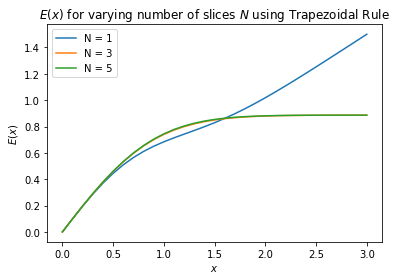

In [4]:
for N in range(1, 6, 2):
    plt.plot(inputX, np.array([trapezoid(N, a, x) for x in inputX]), label="N = {slices}".format(slices = N))
    plt.xlabel(r"$x$")
    plt.ylabel(r"$E(x)$")
    plt.title("$E(x)$ for varying number of slices $N$ using Trapezoidal Rule")
    plt.legend()
    
plt.savefig("numerical integ for e(x).png", dpi=300)

### Exercise 5.4: The diffraction limit of a telescope

Our ability to resolve detail in astronomical observations is limited by the diffraction of light in our telescopes. Light from stars can be treated effectively as coming from a point source at infinity. When such light, with wavelength $\lambda$, passes throught the circular aperture of a telescope of unit radius and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction pattern consisting of central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by

$$ I(r) = \left[\frac{J_1(kr)}{kr}\right]^2 $$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=\frac{2\pi}{\lambda}$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$$ J_m(x) = \frac{1}{\pi}\int\limits_0^{\pi}\cos(m\theta-x\sin\theta) d\theta $$

where $m$ is a nonnegative integer and $x \geq 0$.

Write a Python function ```J(m,x)``` that calculates the value of $J_m(x)$ using Simpson’s rule with $N=1000$ points. Use your function in a program to make a plot, on a single graph, of the Bessel functions from $m=0$ to $m=5$ as function of $x$ from $x=0$ to $x=20$.

In [5]:
def Bessel_integrand(m, x, theta):
    return np.cos(m*theta - x*np.sin(theta))/np.pi

def J(m,x):
    #Evaluating the Bessel function by Simpson's Rule
    a, b, N = 0, np.pi, 1000
    h = (b-a)/N
    points = np.linspace(a, b, N+1)
    Bessel_value = Bessel_integrand(m, x, points) #points = theta since it is the variable we are integrating wrt
    integral = (1/3)*h*(Bessel_value[0] + Bessel_value[-1] + 4*np.sum(Bessel_value[1:-1:2]) + 2*np.sum(Bessel_value[2:-1:2]))
    return integral

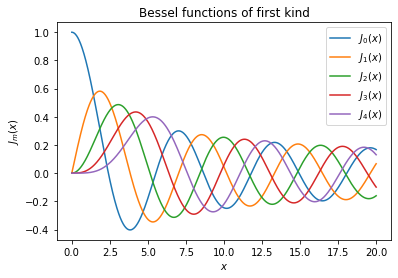

In [6]:
Bessel_order = np.arange(0, 5 ,1)
BesselX = np.linspace(0, 20, 1000) #Increasing the interval (1000) will make the bessel much smoother

for m in Bessel_order:
    Bessel_value = np.array([J(m, x) for x in BesselX])
    plt.plot(BesselX, Bessel_value, label="$J_{}(x)$".format(m))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$J_m(x)$')
    plt.title("Bessel functions of first kind")
    plt.legend()
    
plt.savefig("bessel functions.png", dpi=300)